# |WQCC> Quantum Optimization Workshop - Quantum Annealing Knapsack Tutorial

In [ ]:
!pip install dwave-ocean-sdk

In [ ]:
# Copyright 2021 D-Wave Systems Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import os
import itertools
import click
import pandas as pd
from dwave.system import LeapHybridCQMSampler
from dimod import ConstrainedQuadraticModel, BinaryQuadraticModel, QuadraticModel

def build_knapsack_cqm(costs, weights, max_weight):
    """Construct a CQM for the knapsack problem.

    Args:
        costs (array-like):
            Array of costs for the items.
        weights (array-like):
            Array of weights for the items.
        max_weight (int):
            Maximum allowable weight for the knapsack.

    Returns:
        Constrained quadratic model instance that represents the knapsack problem.
    """
    num_items = len(costs)
    print("\nBuilding a CQM for {} items.".format(str(num_items)))

    cqm = ConstrainedQuadraticModel()
    obj = BinaryQuadraticModel(vartype='BINARY')
    constraint = QuadraticModel()

    # Useful commands: https://docs.ocean.dwavesys.com/en/stable/docs_dimod/reference/models.html#module-dimod.constrained.constrained
    # BinaryQuadraticModel and QuadraticModel:
    # .add_variable()
    # .set_linear()
    # ConstrainedQuadraticModel:
    # .set_objective()
    # .add_constraint()

    for i in range(num_items):
        # TODO 1: Add current variable to objective function

        # TODO 2: Add the "cost" of this variable. Remember,
        # DWave's solver will minimize (not maximize) the total costs

        # TODO 3: Now that you know how to create an objective function,
        # create a constraint for the weight

    # TODO 4: Set Constrained Model's objective and constraint

    return cqm

In [ ]:
# Filled out for you.
def parse_solution(sampleset, costs, weights):
    """Translate the best sample returned from solver to shipped items.

    Args:

        sampleset (dimod.Sampleset):
            Samples returned from the solver.
        costs (array-like):
            Array of costs for the items.
        weights (array-like):
            Array of weights for the items.
    """
    feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)

    if not len(feasible_sampleset):
        raise ValueError("No feasible solution found")

    best = feasible_sampleset.first

    selected_item_indices = [key for key, val in best.sample.items() if val==1.0]
    selected_weights = list(weights[i] for i in selected_item_indices)
    selected_costs = list(costs[i] for i in selected_item_indices)

    print("\nFound best solution at energy {}".format(best.energy))
    print("\nSelected item numbers (0-indexed):", selected_item_indices)
    print("\nSelected item weights: {}, total = {}".format(selected_weights, sum(selected_weights)))
    print("\nSelected item costs: {}, total = {}".format(selected_costs, sum(selected_costs)))

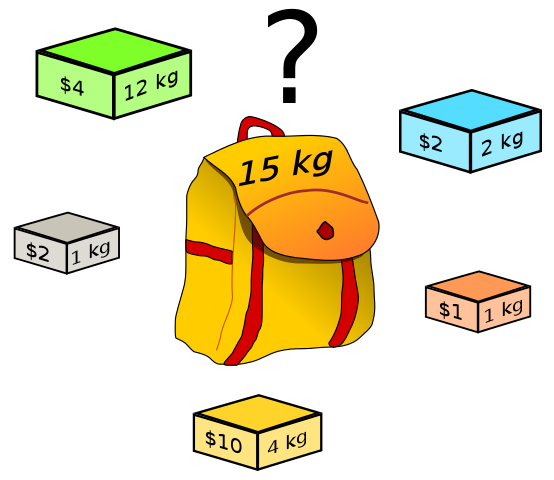

In [ ]:
# Solve a knapsack problem using a Constrained Quadratic Model (CQM) solver.

# TODO 5: Add your Leap API token here
sampler = LeapHybridCQMSampler(token="<YOUR_LEAP_API_TOKEN>")

# TODO 6: Fill out these values as the above problem (or your own!)
costs =
weights =
capacity =

cqm = build_knapsack_cqm(costs, weights, capacity)

print("Submitting CQM to solver {}.".format(sampler.solver.name))
sampleset = sampler.sample_cqm(
    cqm, label="WQCC Quantum Annealing Workshop - Knapsack")

parse_solution(sampleset, costs, weights)